In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this dataset we have "Marketplace Performance Analysis".
Columns Description of the dataset:

ProductID: An unique id for Each Product

ProductName: The product name.

Category: The name of the category in which this product is.

Price: The cost of the product/item

Rating: The average customer rating for the product, usually on a scale from 1 to 5

NumReviews: No of customer reviews for the product

StockQuantity: Contain total stock qty in this product.

Discount: Discount rate for the product

Sales: Number of Units Sold.

DateAdded: The introduction date of the product in commerce.

City: The city in which the product is sold or from where it ships.

In [2]:
ecommerce_trend=pd.read_csv('ecommerce_product_dataset.csv')
ecommerce_trend.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


Jadi kita akan menjawab pertanyaan seputar data-data di atas

1. Produk mana yang memiliki total penjualan tertinggi?

In [37]:

total_sales=ecommerce_trend.groupby('ProductName',observed=False)['Sales'].sum()
total_sales=total_sales.sort_values(ascending=False)
total_sales.head(1)


ProductName
Biography    23947
Name: Sales, dtype: int64

produk biography yang memiliki penjualan paling tinggi dengan 23947 yang berhasil terjual

2. Kategori mana yang menghasilkan penjualan rata-rata tertinggi?

In [ ]:

Avg_sales=ecommerce_trend.groupby('Category',observed=False)['Sales'].mean()
Avg_sales=Avg_sales.sort_values(ascending=False)
Avg_sales.head(1)



Category
Bedsheets    1165.775
Name: Sales, dtype: float64

kategori bedsheets memiliki penjualan rata-rata tertinggi 

3. Kota mana yang memiliki penjualan total tertinggi dan terendah?

In [5]:
total_sales_city=ecommerce_trend.groupby('City',observed=False)['Sales'].sum().sort_values(ascending=False)
print(f'kota dengan penjualan tertinggi adalah {total_sales_city.idxmax()} dengan penjualan {total_sales_city.max()} \n'  
      f'kota dengan penjualan terendah adalaha {total_sales_city.idxmin()} dengan penjualan {total_sales_city.min()}') 

kota dengan penjualan tertinggi adalah Pittsburgh dengan penjualan 20633 
kota dengan penjualan terendah adalaha Riverside dengan penjualan 2280


4. Apakah ada hubungan antara diskon dan jumlah penjualan?


In [6]:
correlate_disc_sales=ecommerce_trend[['Discount','Sales']].corr()

correlate_disc_sales

,Discount,Sales
Discount,1.000000,0.027413
Sales,0.027413,1.000000


Tidak ada hubungan antara diskon dan jumlah penjualan dikarenakan korelasinya hanya sebesar 2%


5. Produk dengan rating tertinggi di setiap kategori.


In [39]:
highest_rating_product=ecommerce_trend.loc[ecommerce_trend.groupby('Category',observed=False).Rating.agg('idxmax')]
highest_rating_product[['Category','ProductName','Rating']].head()

,Category,ProductName,Rating
423,Art and crafting materials,Paint Set,4.9
753,Bath and body,Body Scrub,4.9
603,Bedsheets,Bamboo Sheets,5.0
389,Bicycles,Road Bike,5.0
977,Blankets,Weighted Blanket,5.0



6. Kategori dengan rata-rata rating tertinggi dan terendah?


In [8]:
avg_rating=ecommerce_trend.groupby('Category',observed=False).Rating.agg('mean')
print(f'Kategori dengan rating tertinggi adalah {avg_rating.idxmax()} dengan rating {avg_rating.max()} \n'
      f'Kategori dengan rating terendah adalah {avg_rating.idxmin()} dengan rating {avg_rating.min()}')

Kategori dengan rating tertinggi adalah Socks dengan rating 3.5125 
Kategori dengan rating terendah adalah Makeup dengan rating 2.755



7. Apakah jumlah ulasan berbanding lurus dengan rating?


In [9]:
ecommerce_trend[['NumReviews','Rating']].corr()

,NumReviews,Rating
NumReviews,1.000000,-0.009832
Rating,-0.009832,1.000000


jumlah ulasan tidak berbanding lurus dengan rating.


8. Produk mana yang stoknya hampir habis tetapi memiliki penjualan tinggi?


In [24]:
#ecommerce_trend_group=ecommerce_trend.groupby('ProductName', observed=False)
ecommerce_trend['stock_current']=ecommerce_trend['Sales']-ecommerce_trend['StockQuantity']
ecommerce_trend.head()
lowest_stock=ecommerce_trend.sort_values(by='stock_current', ascending=False)[['ProductName','Sales','StockQuantity']]
lowest_stock.head()

,ProductName,Sales,StockQuantity
103,Toaster,1976,27
240,Sunscreen,1981,68
614,Linen Sheets,1983,72
280,Mascara,1979,78
962,Electric Blanket,1919,26


produkid 103 dengan nama produk toaster memiliki penjualan sebesar 1976 dan hanya tersisa 27 stok


9. Apakah harga memengaruhi tingkat penjualan?


,Price,Sales
Price,1.000000,0.029076
Sales,0.029076,1.000000


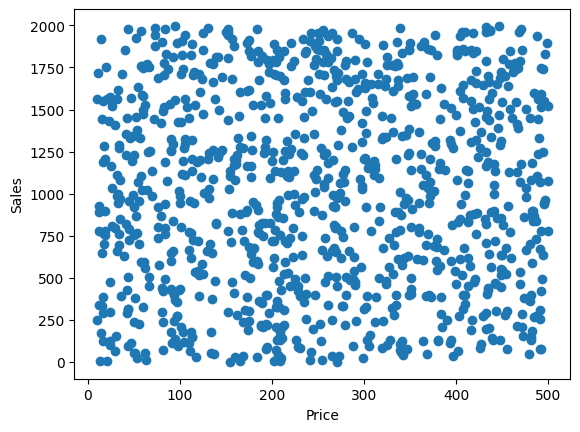

In [29]:
plt.scatter(ecommerce_trend['Price'],ecommerce_trend['Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
ecommerce_trend[['Price','Sales']].corr()

persebaran merata jika dilihat pada scatter plot meyakinkan kita bahwa harga tidak memengaruhi tingkat penjualan


10. Kategori apa yang paling sering memberikan diskon besar?

In [36]:
highest_discount=ecommerce_trend[ecommerce_trend['Discount']>0.30]
highest_discount.groupby('Category',observed=False)['ProductName'].count().sort_values(ascending=False)

Category
Makeup                        22
Blankets                      18
Vitamins and supplements      18
Perfume and cologne           18
Art and crafting materials    18
Motor vehicle parts           17
Bedsheets                     17
Clothing                      17
Wine                          17
Toys & Games                  16
Posters and artwork           16
Underwear                     16
Mobile phone accessories      15
Coats and jackets             15
Electronics                   15
Socks                         15
Nail care                     15
Cookware                      14
Skin care                     14
Home & Kitchen                13
Candles                       13
Bicycles                      12
Books                         12
Drinkware                     12
Bath and body                  8
Name: ProductName, dtype: int64

Kategori make up yang paling banyak memberikan diskon besar dengan jumlah 22 produk